# Speech-to-Text and Text-to-Speech Demo

This notebook demonstrates how to use OpenAI Whisper for speech-to-text conversion and various text-to-speech solutions.

## Requirements

Before running this notebook, make sure you have the following packages installed:
<!-- 
```bash
pip install openai-whisper torch torchaudio
pip install gtts playsound3  # For text-to-speech
pip install librosa soundfile  # For audio processing
pip install matplotlib numpy  # For visualization
``` -->


In [1]:
import whisper
import torch
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from gtts import gTTS
import os
import tempfile
from IPython.display import Audio, display, HTML
import warnings
warnings.filterwarnings('ignore')


## 1. Speech-to-Text with OpenAI Whisper

Whisper is an automatic speech recognition (ASR) system trained on 680,000 hours of multilingual and multitask supervised data collected from the web.


In [2]:
# Load the Whisper model
# Available models: tiny, base, small, medium, large
# Larger models are more accurate but slower
model = whisper.load_model("base")
print(f"Loaded Whisper model: base")
print(f"Model device: {next(model.parameters()).device}")


Loaded Whisper model: base
Model device: cpu


### Example 1: Transcribe from an audio file

First, let's create a simple audio file to demonstrate the speech-to-text functionality.


In [3]:
# Create a simple test audio file using text-to-speech
def create_test_audio(text, filename="test_audio.wav"):
    """Create an audio file from text using gTTS"""
    tts = gTTS(text=text, lang='en', slow=False)
    tts.save(filename)
    print(f"Created audio file: {filename}")
    return filename

# Create test audio
test_text = "Hello, this is a test of OpenAI Whisper speech recognition. How well can it understand this audio?"
audio_file = create_test_audio(test_text, "demo_audio.wav")

# Play the audio in the notebook
display(Audio(audio_file))


Created audio file: demo_audio.wav


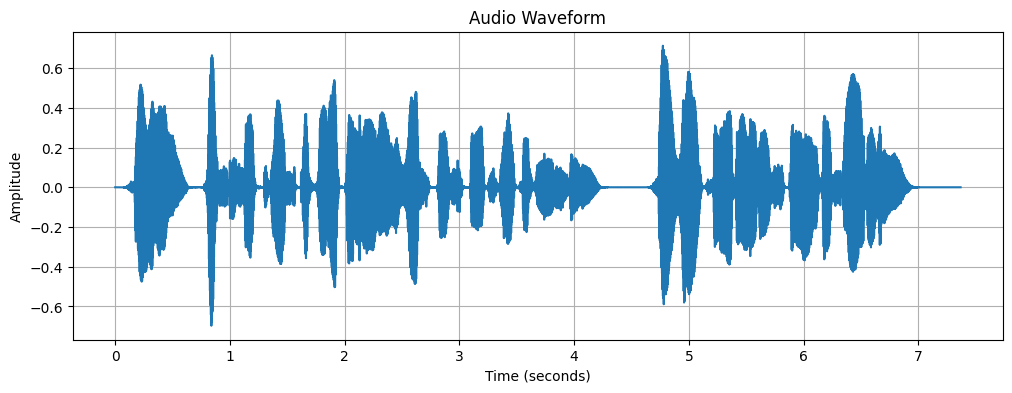

Audio duration: 7.37 seconds
Sample rate: 24000 Hz


In [4]:
# Load and visualize the audio
audio_data, sample_rate = librosa.load(audio_file, sr=None)

# Plot the audio waveform
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(audio_data)/sample_rate, len(audio_data)), audio_data)
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

print(f"Audio duration: {len(audio_data)/sample_rate:.2f} seconds")
print(f"Sample rate: {sample_rate} Hz")


In [5]:
# Transcribe the audio using Whisper
print("Transcribing audio with Whisper...")
result = model.transcribe(audio_file)

print("\nTranscription Results:")
print("=" * 50)
print(f"Text: {result['text']}")
print(f"Language: {result['language']}")

print("\nDetailed Segments:")
for i, segment in enumerate(result['segments']):
    print(f"Segment {i+1}: [{segment['start']:.2f}s - {segment['end']:.2f}s]")
    print(f"  Text: {segment['text']}")
    print(f"  Confidence: {segment.get('no_speech_prob', 'N/A')}")


Transcribing audio with Whisper...

Transcription Results:
Text:  Hello, this is a test of OpenAI whisper speech recognition. How well can it understand this audio?
Language: en

Detailed Segments:
Segment 1: [0.00s - 4.56s]
  Text:  Hello, this is a test of OpenAI whisper speech recognition.
  Confidence: 0.02079138718545437
Segment 2: [4.56s - 7.20s]
  Text:  How well can it understand this audio?
  Confidence: 0.02079138718545437


## 2. Text-to-Speech Examples

Now let's explore different text-to-speech options.


In [6]:
# Example text for text-to-speech
sample_texts = [
    "Hello! This is a text-to-speech demonstration.",
    "OpenAI Whisper can convert speech to text with high accuracy.",
    "The integration of speech recognition and text-to-speech enables many applications."
]

print("Sample texts for TTS:")
for i, text in enumerate(sample_texts, 1):
    print(f"{i}. {text}")


Sample texts for TTS:
1. Hello! This is a text-to-speech demonstration.
2. OpenAI Whisper can convert speech to text with high accuracy.
3. The integration of speech recognition and text-to-speech enables many applications.


### Method 1: Google Text-to-Speech (gTTS)


In [7]:
def text_to_speech_gtts(text, filename="output_gtts.mp3", lang='en'):
    """Convert text to speech using Google Text-to-Speech"""
    try:
        tts = gTTS(text=text, lang=lang, slow=False)
        tts.save(filename)
        print(f"Generated audio file: {filename}")
        return filename
    except Exception as e:
        print(f"Error generating TTS: {e}")
        return None

# Generate TTS for the first sample text
tts_file = text_to_speech_gtts(sample_texts[0], "demo_tts.mp3")

if tts_file:
    display(Audio(tts_file))


Generated audio file: demo_tts.mp3


In [9]:
# Generate TTS in different languages
languages = {
    'en': 'English',
    'fr': 'French',
    'it': 'Italian',
    "zh": "Chinese",
    "ja": "Japanese",
    "ko": "Korean",
    "ru": "Russian",
    "ar": "Arabic",
    "hi": "Hindi",
    "bn": "Bengali"
}

multilingual_text = "Hello, this is a multilingual text-to-speech demonstration."

print("Generating TTS in multiple languages...")
for lang_code, lang_name in languages.items():
    filename = f"tts_{lang_code}.mp3"
    if text_to_speech_gtts(multilingual_text, filename, lang_code):
        print(f"{lang_name}: {filename}")
        display(HTML(f"<h4>{lang_name}</h4>"))
        display(Audio(filename))


Generating TTS in multiple languages...
Generated audio file: tts_en.mp3
English: tts_en.mp3


Generated audio file: tts_fr.mp3
French: tts_fr.mp3


Generated audio file: tts_it.mp3
Italian: tts_it.mp3


Generated audio file: tts_zh.mp3
Chinese: tts_zh.mp3


Generated audio file: tts_ja.mp3
Japanese: tts_ja.mp3


Generated audio file: tts_ko.mp3
Korean: tts_ko.mp3


Generated audio file: tts_ru.mp3
Russian: tts_ru.mp3


Generated audio file: tts_ar.mp3
Arabic: tts_ar.mp3


Generated audio file: tts_hi.mp3
Hindi: tts_hi.mp3


Generated audio file: tts_bn.mp3
Bengali: tts_bn.mp3


## 3. Complete Speech-to-Text and Text-to-Speech Pipeline


In [10]:
def speech_pipeline(text, whisper_model=None):
    """Complete pipeline: Text -> Speech -> Text"""
    if whisper_model is None:
        whisper_model = whisper.load_model("base")
    
    print(f"Original text: {text}")
    
    # Step 1: Text to Speech
    print("\nStep 1: Converting text to speech...")
    tts_filename = "pipeline_tts.mp3"
    tts_file = text_to_speech_gtts(text, tts_filename)
    
    if not tts_file:
        print("Failed to generate TTS")
        return None
    
    # Play the generated speech
    display(Audio(tts_filename))
    
    # Step 2: Speech to Text
    print("\nStep 2: Converting speech back to text...")
    result = whisper_model.transcribe(tts_filename)
    transcribed_text = result['text'].strip()
    
    print(f"\nTranscribed text: {transcribed_text}")
    
    # Step 3: Compare original and transcribed text
    print("\nComparison:")
    print("=" * 50)
    print(f"Original:  {text}")
    print(f"Transcribed: {transcribed_text}")
    
    # Calculate similarity (simple word-based)
    original_words = set(text.lower().split())
    transcribed_words = set(transcribed_text.lower().split())
    common_words = original_words.intersection(transcribed_words)
    similarity = len(common_words) / len(original_words) * 100
    
    print(f"\nWord similarity: {similarity:.1f}%")
    print(f"Common words: {len(common_words)}/{len(original_words)}")
    
    return {
        'original': text,
        'transcribed': transcribed_text,
        'similarity': similarity,
        'tts_file': tts_filename
    }


In [11]:
# Test the pipeline
test_sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "Speech recognition technology has improved significantly in recent years.",
    "OpenAI Whisper provides state-of-the-art speech recognition capabilities."
]

print("Testing complete speech pipeline...")
results = []

for i, sentence in enumerate(test_sentences, 1):
    print(f"\n{'='*60}")
    print(f"Test {i}: {sentence}")
    print(f"{'='*60}")
    
    result = speech_pipeline(sentence)
    if result:
        results.append(result)
    
    print("\n" + "-"*60)


Testing complete speech pipeline...

Test 1: The quick brown fox jumps over the lazy dog.
Original text: The quick brown fox jumps over the lazy dog.

Step 1: Converting text to speech...
Generated audio file: pipeline_tts.mp3



Step 2: Converting speech back to text...

Transcribed text: The quick brown fox jumps over the lazy dog.

Comparison:
Original:  The quick brown fox jumps over the lazy dog.
Transcribed: The quick brown fox jumps over the lazy dog.

Word similarity: 100.0%
Common words: 8/8

------------------------------------------------------------

Test 2: Speech recognition technology has improved significantly in recent years.
Original text: Speech recognition technology has improved significantly in recent years.

Step 1: Converting text to speech...
Generated audio file: pipeline_tts.mp3



Step 2: Converting speech back to text...

Transcribed text: Speech recognition technology has improved significantly in recent years.

Comparison:
Original:  Speech recognition technology has improved significantly in recent years.
Transcribed: Speech recognition technology has improved significantly in recent years.

Word similarity: 100.0%
Common words: 9/9

------------------------------------------------------------

Test 3: OpenAI Whisper provides state-of-the-art speech recognition capabilities.
Original text: OpenAI Whisper provides state-of-the-art speech recognition capabilities.

Step 1: Converting text to speech...
Generated audio file: pipeline_tts.mp3



Step 2: Converting speech back to text...

Transcribed text: OpenAI Whisper provides state-of-the-art speech recognition capabilities.

Comparison:
Original:  OpenAI Whisper provides state-of-the-art speech recognition capabilities.
Transcribed: OpenAI Whisper provides state-of-the-art speech recognition capabilities.

Word similarity: 100.0%
Common words: 7/7

------------------------------------------------------------


## 4. Performance Analysis


In [12]:
# Analyze the results
if results:
    print("Pipeline Performance Summary:")
    print("=" * 50)
    
    similarities = [r['similarity'] for r in results]
    avg_similarity = np.mean(similarities)
    
    print(f"Average similarity: {avg_similarity:.1f}%")
    print(f"Best similarity: {max(similarities):.1f}%")
    print(f"Worst similarity: {min(similarities):.1f}%")
    
    print("\nDetailed Results:")
    for i, result in enumerate(results, 1):
        print(f"\nTest {i}:")
        print(f"  Original: {result['original'][:50]}...")
        print(f"  Transcribed: {result['transcribed'][:50]}...")
        print(f"  Similarity: {result['similarity']:.1f}%")
else:
    print("No results to analyze.")


Pipeline Performance Summary:
Average similarity: 100.0%
Best similarity: 100.0%
Worst similarity: 100.0%

Detailed Results:

Test 1:
  Original: The quick brown fox jumps over the lazy dog....
  Transcribed: The quick brown fox jumps over the lazy dog....
  Similarity: 100.0%

Test 2:
  Original: Speech recognition technology has improved signifi...
  Transcribed: Speech recognition technology has improved signifi...
  Similarity: 100.0%

Test 3:
  Original: OpenAI Whisper provides state-of-the-art speech re...
  Transcribed: OpenAI Whisper provides state-of-the-art speech re...
  Similarity: 100.0%


## 5. Cleanup and Summary


In [14]:
# Clean up generated files
def cleanup_files():
    """Remove generated audio files"""
    files_to_remove = [
        "demo_audio.wav",
        "demo_tts.mp3", 
        "pipeline_tts.mp3"
    ]
    
    # Add multilingual TTS files
    for lang in ['en', 'es', 'fr', 'de', 'it']:
        files_to_remove.append(f"tts_{lang}.mp3")
    
    removed_count = 0
    for file in files_to_remove:
        if os.path.exists(file):
            os.remove(file)
            removed_count += 1
    
    print(f"Cleaned up {removed_count} audio files.")

# Uncomment the line below to clean up files
cleanup_files()


Cleaned up 8 audio files.


## Summary

This notebook demonstrated:

1. **Speech-to-Text with OpenAI Whisper**:
   - Loading different Whisper models
   - Transcribing audio files
   - Using various transcription options
   - Analyzing transcription results

2. **Text-to-Speech with gTTS**:
   - Converting text to speech
   - Multilingual TTS support
   - Audio playback in Jupyter notebooks

3. **Complete Pipeline**:
   - Text → Speech → Text conversion
   - Performance analysis
   - Similarity measurement

### Key Features:
- **Whisper Models**: Choose from tiny, base, small, medium, or large models based on your accuracy vs. speed requirements
- **Multilingual Support**: Both Whisper and gTTS support multiple languages
- **Audio Visualization**: Waveform plotting and audio playback
- **Performance Metrics**: Similarity analysis between original and transcribed text

### Next Steps:
- Try with your own audio files
- Experiment with different Whisper models
- Explore other TTS libraries (pyttsx3, Azure Cognitive Services, etc.)
- Add real-time speech recognition
- Implement voice cloning or custom voice models
